<h1>Regularization for Linear Regression</h1>

<p>Notebook for Ridge, Lasso, ElasticNet Regressions in comparison with sklearn's</p>

In [1]:
from abc import ABC, abstractmethod

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

from IPython.display import HTML
%matplotlib inline

In [2]:
class BaseRegression(ABC):
    def init_weights(self, input_shape):
        self.w = np.random.normal(0, 1, size=(input_shape, 1))
        self.b = np.random.normal(0, 1, size=(1, 1))
    
    @staticmethod
    def mse(y_true, y_pred):
        return np.mean((y_true - y_pred)**2)
    
    @staticmethod
    def mse_derivative(y_true, y_pred):
        return -2 * (y_true - y_pred) / y_true.shape[0]
    
    @abstractmethod
    def w_grad(self, x, y):
        pass
    
    def b_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        ones = np.ones((len(y), 1))
        grad = ones.T.dot(mse_deriv)
        return grad
    
    def fit(self, x, y, lr=0.01, n_iter=1000):
        self.init_weights(x.shape[1])
        for _ in range(n_iter):
            w_grad = self.w_grad(x, y)
            b_grad = self.b_grad(x, y)
            self.w -= lr * w_grad
            self.b -= lr * b_grad
            
        return self
    
    def predict(self, x):
        return x.dot(self.w) + self.b

In [3]:
class LinearRegression(BaseRegression):  
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv)
        return grad


class RidgeRegression(BaseRegression):
    def __init__(self, alpha=0):
        self.alpha = alpha
    
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv) + (2 * self.alpha * self.w) / y.shape[0]
        return grad


class LassoRegression(BaseRegression):
    def __init__(self, alpha=0):
        self.alpha = alpha

    @staticmethod
    def mse_derivative(y_true, y_pred):
        return -(y_true - y_pred) / y_true.shape[0]
    
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv) + self.alpha * np.sign(self.w)
        return grad


class ElasticNetRegression(BaseRegression):
    def __init__(self, alpha=0, l1_ratio=0):
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    @staticmethod
    def mse_derivative(y_true, y_pred):
        return -(y_true - y_pred) / y_true.shape[0]
    
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv) + (self.alpha * (1 - self.l1_ratio) * self.w)\
             + self.alpha * self.l1_ratio * np.sign(self.w)
        return grad

In [4]:
x, y = make_regression(n_samples=100, n_features=50, bias=1, noise=10, n_informative=25)

scaler = StandardScaler()
x = scaler.fit_transform(x)

y = y.reshape(-1, 1)
x.shape, y.shape

((100, 50), (100, 1))

In [5]:
reg = LinearRegression()
reg.fit(x, y, n_iter=10000)

In [6]:
x_ols = np.hstack((np.ones((len(x), 1)), x))
w = np.linalg.inv(x_ols.T.dot(x_ols)).dot(x_ols.T).dot(y)
np.allclose(reg.w, w[1:])

True

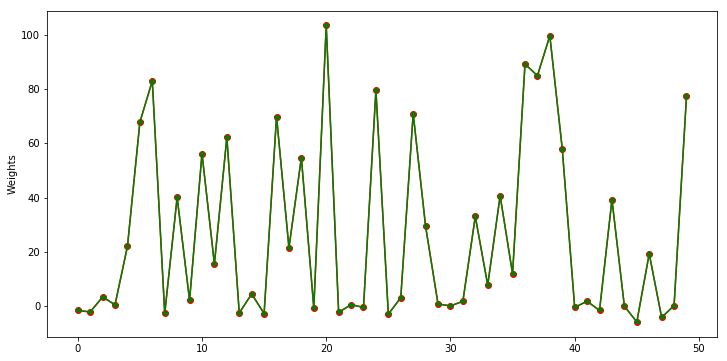

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(reg.w)), reg.w.ravel(), 'ro-')
plt.plot(range(len(reg.w)), w[1:].ravel(), 'g*-')
plt.ylabel('Weights');

In [9]:
reg_ridge = RidgeRegression(10)
reg_ridge.fit(x, y, n_iter=10000)
print(reg_ridge.b)
print(reg_ridge.w.T)

[[-39.29092671]]
[[ -5.98397607 -11.21015044   2.52521168  -1.60492152  12.66867514
   56.1268237   72.25359974   0.53495874  35.66509036   7.22433076
   50.51872743  16.89154122  48.05850667  -0.42384766  -2.98371457
    1.06646421  49.95037381  16.08367494  40.93369496   0.15571029
   88.91055041  -1.29576196   7.40406738  -2.44827344  65.28194282
   -8.22861834  -2.93141534  61.24898661  26.57781824   0.16513289
   -8.44984106   8.63135148  23.22589934  -2.82082332  35.78499202
   14.10061172  78.477655    74.87177477  85.69998589  49.80001599
    5.00221433   1.94757775  -5.03379551  25.30400362   3.17017952
   -8.15341573  14.8532354   -1.91889183   2.01746207  63.07836806]]


In [10]:
ridge = Ridge(10)
ridge.fit(x, y)
print(ridge.intercept_)
print(ridge.coef_)

[-39.29092671]
[[ -5.98397607 -11.21015044   2.52521168  -1.60492152  12.66867514
   56.1268237   72.25359974   0.53495874  35.66509036   7.22433076
   50.51872743  16.89154122  48.05850667  -0.42384766  -2.98371457
    1.06646421  49.95037381  16.08367494  40.93369496   0.15571029
   88.91055041  -1.29576196   7.40406738  -2.44827344  65.28194282
   -8.22861834  -2.93141534  61.24898661  26.57781824   0.16513289
   -8.44984106   8.63135148  23.22589934  -2.82082332  35.78499202
   14.10061172  78.477655    74.87177477  85.69998589  49.80001599
    5.00221433   1.94757775  -5.03379551  25.30400362   3.17017952
   -8.15341573  14.8532354   -1.91889183   2.01746207  63.07836806]]


In [9]:
np.allclose(ridge.coef_, reg_ridge.w.T)

True

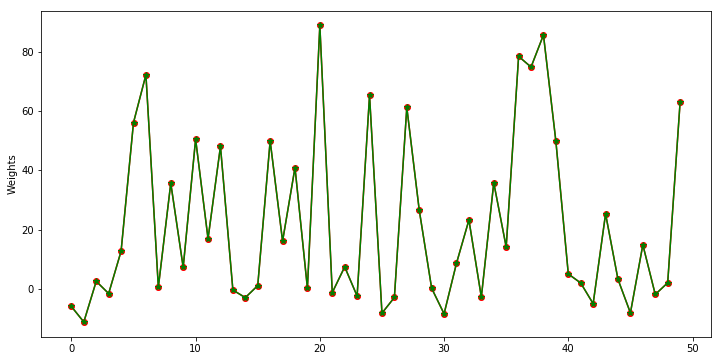

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(ridge.coef_.ravel())), reg_ridge.w.ravel(), 'ro-')
plt.plot(range(len(ridge.coef_.ravel())), ridge.coef_.ravel(), 'g*-')
plt.ylabel('Weights');

In [15]:
reg_lasso = LassoRegression(alpha=3)
reg_lasso.fit(x, y, n_iter=10000)
print(reg_lasso.b)
print(reg_lasso.w.T)

[[-39.29092671]]
[[ 2.05664114e-02 -2.30929176e+00 -1.30620585e-02 -1.37525237e-02
   1.39322561e+01  6.28594512e+01  8.20380637e+01 -7.62028705e-03
   3.57920331e+01  1.99095728e-01  5.13269336e+01  1.50838490e+01
   5.35263635e+01  2.66080863e-02 -4.33054155e-02 -2.13608634e-02
   6.12061375e+01  2.01776853e+01  4.63981152e+01  2.38758854e-02
   1.02795449e+02 -7.96731647e-03  2.09763973e+00 -8.18257432e-03
   7.43273896e+01 -2.00586474e-01  4.72304973e-03  6.66746110e+01
   2.46430933e+01 -2.59546715e-03 -1.87745093e+00  3.77197178e-02
   2.75247438e+01 -1.71392998e-02  3.52678534e+01  1.07916467e+01
   8.76949128e+01  7.93947488e+01  9.60407601e+01  5.14092865e+01
   2.90372710e-02 -7.15242449e-03  4.81328558e-03  2.75235960e+01
  -2.31924027e-02 -2.22799154e-02  1.60431381e+01 -1.36392422e-02
  -5.37458582e-03  7.15552766e+01]]


In [16]:
lasso = Lasso(alpha=3)
lasso.fit(x, y)
print(lasso.intercept_)
print(lasso.coef_)

[-39.29092671]
[ -0.          -2.31246073   0.           0.          13.93916622
  62.86312155  82.03817619   0.          35.78335961   0.19645828
  51.33770274  15.09137224  53.53527993   0.          -0.
  -0.          61.22379644  20.18960161  46.39586695   0.
 102.80671756  -0.           2.08935325  -0.          74.32735245
  -0.19174594  -0.          66.66733929  24.64712756   0.
  -1.88764046   0.          27.52656329   0.          35.26463538
  10.80244175  87.6965373   79.4063347   96.04034554  51.40805695
   0.           0.          -0.          27.52687544   0.
  -0.          16.04317739   0.           0.          71.55895491]


In [17]:
np.allclose(lasso.coef_, reg_lasso.w.T)

False

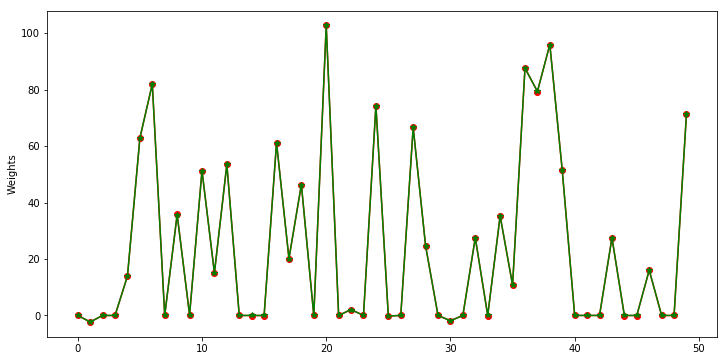

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(lasso.coef_)), reg_lasso.w.ravel(), 'ro-')
plt.plot(range(len(lasso.coef_)), lasso.coef_.ravel(), 'g*-')
plt.ylabel('Weights');

In [19]:
reg_elastic = ElasticNetRegression(alpha=10, l1_ratio=0.8)
reg_elastic.fit(x, y, n_iter=10000)
print(reg_elastic.b)
print(reg_elastic.w.T)

[[-39.29092671]]
[[-1.00818287e+00 -7.87768777e+00  3.88427352e+00 -2.14757429e+00
  -5.73949461e-01  1.66486891e+01  2.06063119e+01  1.32170154e-02
   1.11863924e+01  7.04027440e+00  1.25128763e+01  1.15446071e+01
   1.36288464e+01  1.63143401e+00 -7.42152629e+00  2.73127178e+00
   1.03234637e+01  1.54264836e+00  4.82951563e+00  8.49515240e-02
   3.02881913e+01 -4.80263460e-01  7.76857657e+00 -1.84372203e-02
   1.41500524e+01 -9.50912426e+00 -6.75062341e+00  2.02405560e+01
   9.14877227e+00  3.42702218e-02 -1.02437577e+01  7.98126619e+00
   6.25132895e-02 -2.63923557e+00  5.59939429e+00  9.69007352e+00
   2.57664085e+01  2.87946514e+01  2.35405159e+01  1.49044463e+01
   6.13403309e+00  1.08519591e-01 -3.35910840e+00  7.85050677e-03
   6.46143027e-02 -2.18964965e-01  7.89644277e+00  6.72597653e-02
   1.12519681e+00  1.22891916e+01]]


In [20]:
elastic = ElasticNet(alpha=10, l1_ratio=0.8)
elastic.fit(x, y)
print(elastic.intercept_)
print(elastic.coef_)

[-39.29092671]
[ -1.00423597  -7.87704132   3.88738594  -2.14473229  -0.57764987
  16.64671079  20.60597123   0.          11.18506303   7.04127705
  12.51344642  11.54191981  13.6256389    1.63066997  -7.42071795
   2.73119709  10.32960267   1.54460191   4.82339166   0.
  30.28746866  -0.48485863   7.77262452  -0.          14.15227267
  -9.50569273  -6.75268788  20.24183403   9.15408271  -0.
 -10.24092022   7.98587259   0.          -2.63362144   5.59988583
   9.69156619  25.76269992  28.79811125  23.53845429  14.90363125
   6.13507851   0.11342834  -3.3619699    0.           0.
  -0.21715918   7.89129354   0.           1.12282622  12.29179095]


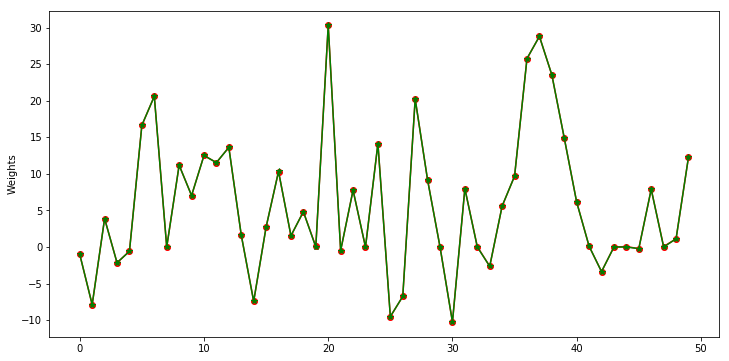

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(elastic.coef_)), reg_elastic.w.ravel(), 'ro-')
plt.plot(range(len(elastic.coef_)), elastic.coef_.ravel(), 'g*-')
plt.ylabel('Weights');

In [22]:
np.allclose(elastic.coef_, reg_elastic.w.T)  # certain accuracy

False

In [23]:
with open('./style.css') as f:
    style = f.read()
HTML(style)

FileNotFoundError: [Errno 2] No such file or directory: './style.css'